In [4]:
import pandas as pd

# Daten einlesen
# Destatis_Wanderungsstatistik_12711-0005
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Wanderungsstatistik_12711-0005_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

,Jahr,Nationalität_Code,Nationalität,Geschlecht,Anzahl,Wanderung_Code,Wanderung_Label
0,2001,NATD,Deutsche,männlich,61592,BEV011,Fortzüge in das Ausland
1,2001,NATD,Deutsche,männlich,104695,BEV029,Zuzüge aus dem Ausland
2,2001,NATD,Deutsche,männlich,43103,BEV012,Wanderungssaldo Ausland
3,2018,NATD,Deutsche,weiblich,98762,BEV011,Fortzüge in das Ausland
4,2018,NATD,Deutsche,weiblich,77171,BEV029,Zuzüge aus dem Ausland


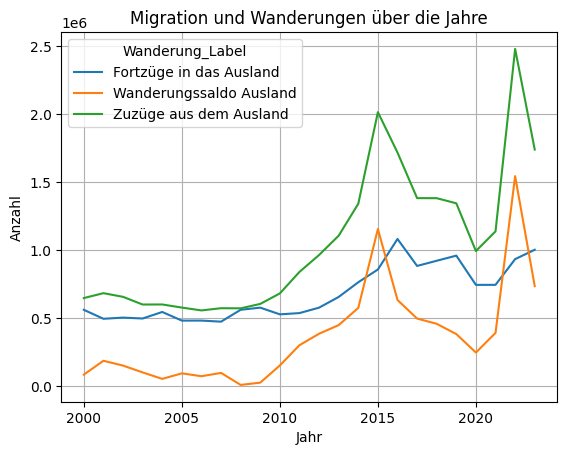

In [6]:
import matplotlib.pyplot as plt

# Liniendiagramm: Wanderung der Ausländer über die Jahre
df_auslaender = df[df["Nationalität"] != "Deutsche"]
# Gruppieren und Pivotieren der Daten
df_auslaender_pivot = df_auslaender.pivot_table(values="Anzahl", index="Jahr", columns="Wanderung_Label", aggfunc="sum")

# Plot erstellen
df_auslaender_pivot.plot(kind="line")
plt.title("Migration und Wanderungen über die Jahre")
plt.ylabel("Anzahl")
plt.xlabel("Jahr")
plt.grid(True)
plt.show()